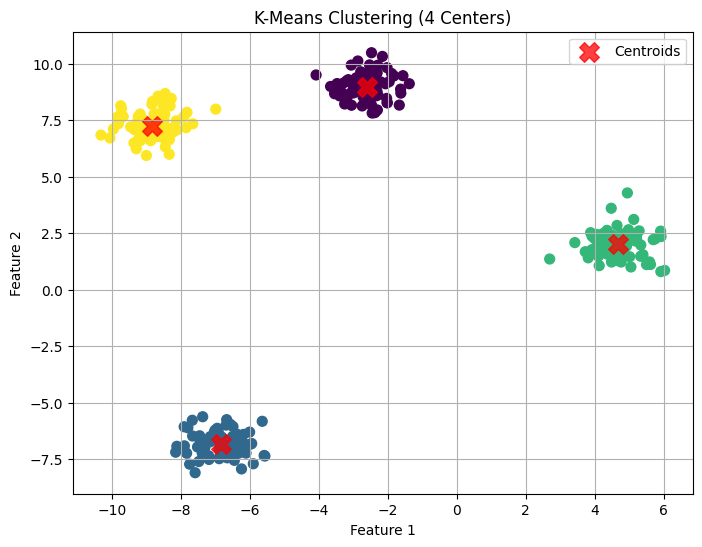

In [1]:
# 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Step 3: Visualize using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering (4 Centers)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# 22  Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels
# Step 1: Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features only

# Step 3: Apply Agglomerative Clustering with 3 clusters
agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X)

# Step 4: Display the first 10 predicted labels
print("First 10 predicted cluster labels:")
print(labels[:10])


First 10 predicted cluster labels:
[1 1 1 1 1 1 1 1 1 1]


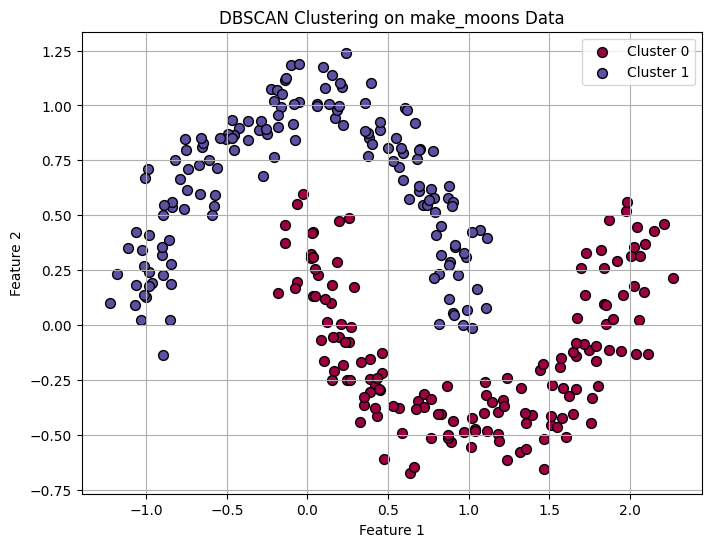

In [3]:
# 23 Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot
# Step 1: Import required libraries
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Generate synthetic moon-shaped data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 4: Plot the results
plt.figure(figsize=(8, 6))

# Unique labels including noise (-1)
unique_labels = set(labels)

# Colors for each cluster, black for noise
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    if k == -1:
        # Noise (outliers) plotted in black
        col = [0, 0, 0, 1]
        label_name = 'Outliers'
    else:
        label_name = f'Cluster {k}'

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=label_name, s=50, edgecolors='k')

plt.title("DBSCAN Clustering on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# 24 Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster
# Step 1: Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Step 2: Load the Wine dataset
wine = load_wine()
X = wine.data

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 5: Print the size of each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Size of each cluster:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} samples")


Size of each cluster:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


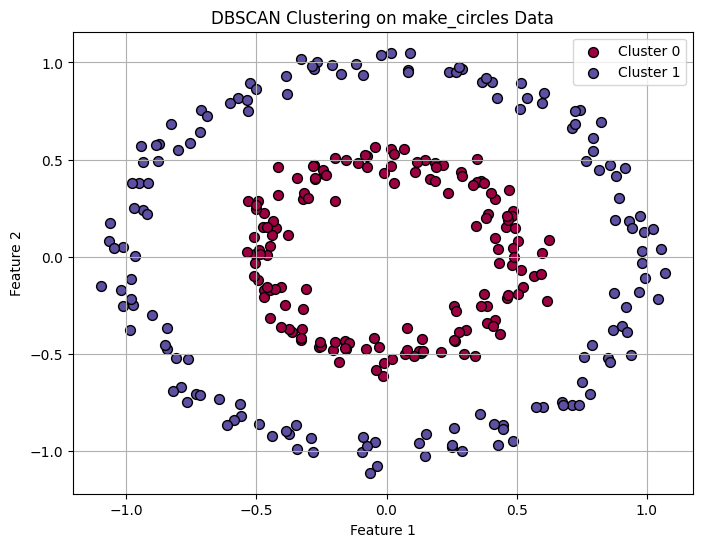

In [5]:
# 25 Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result
# Step 1: Import necessary libraries
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Generate circular synthetic data
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 4: Plot the clustering result
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    if k == -1:
        # Outliers (noise points)
        col = [0, 0, 0, 1]
        label_name = 'Outliers'
    else:
        label_name = f'Cluster {k}'

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=label_name, s=50, edgecolors='k')

plt.title("DBSCAN Clustering on make_circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# 26 Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroieds
# Step 1: Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Step 2: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

# Step 3: Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Step 5: Output the cluster centroids
centroids = kmeans.cluster_centers_

# Convert to a DataFrame for better readability
centroids_df = pd.DataFrame(centroids, columns=feature_names)
print("Cluster Centroids (after MinMax Scaling):")
print(centroids_df)


Cluster Centroids (after MinMax Scaling):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst f

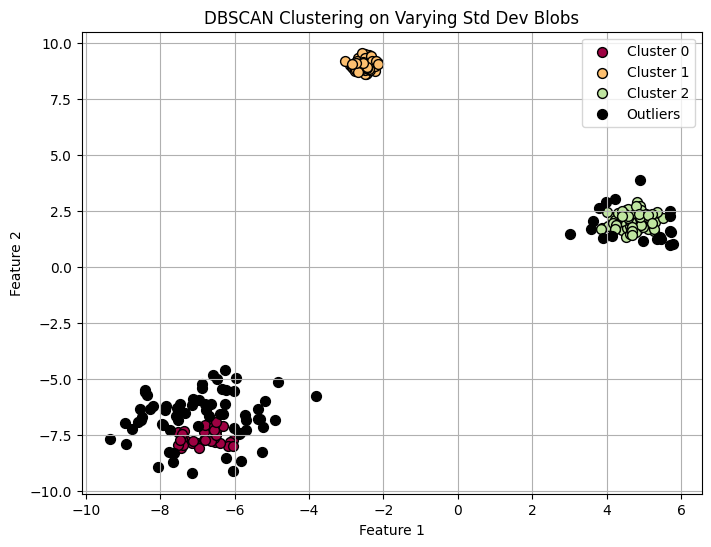

In [7]:
# 27 Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with dbscan
# Step 1: Import required libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Generate synthetic data with varying cluster std deviations
X, y_true = make_blobs(n_samples=300,
                       centers=3,
                       cluster_std=[0.2, 0.5, 1.0],
                       random_state=42)

# Step 3: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 4: Plot the results
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]

    if k == -1:
        # Black for outliers
        col = [0, 0, 0, 1]
        label_name = 'Outliers'
    else:
        label_name = f'Cluster {k}'

    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=label_name, s=50, edgecolors='k')

plt.title("DBSCAN Clustering on Varying Std Dev Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


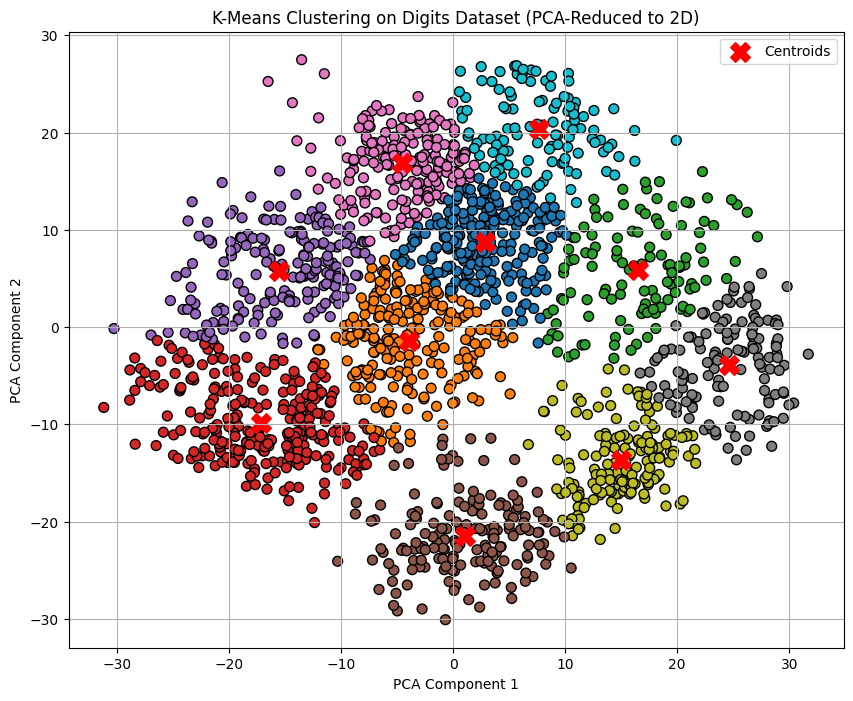

In [8]:
# 28 Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
# Step 1: Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 2: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # Actual digit labels (not used in clustering, but useful for comparison)

# Step 3: Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 4: Apply K-Means clustering (10 clusters for digits 0-9)
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Step 5: Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering on Digits Dataset (PCA-Reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


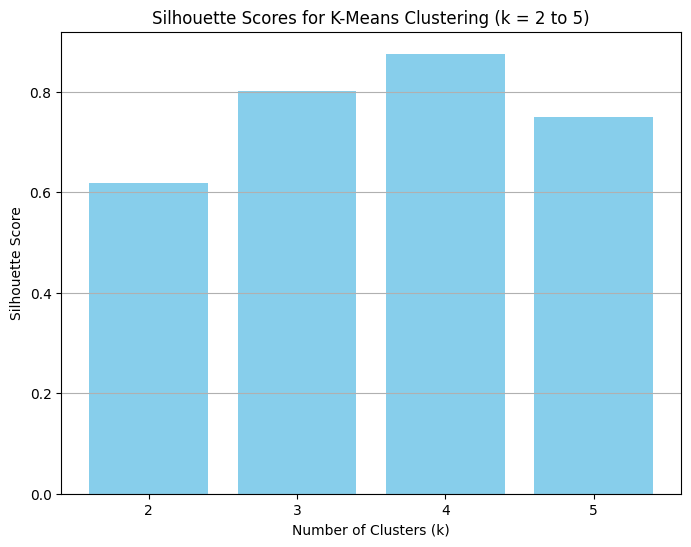

In [9]:
# 29 Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart
# Step 1: Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 2: Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Step 3: Evaluate silhouette scores for k = 2 to 5
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Step 4: Display the silhouette scores as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for K-Means Clustering (k = 2 to 5)")
plt.xticks(k_values)
plt.grid(axis='y')
plt.show()


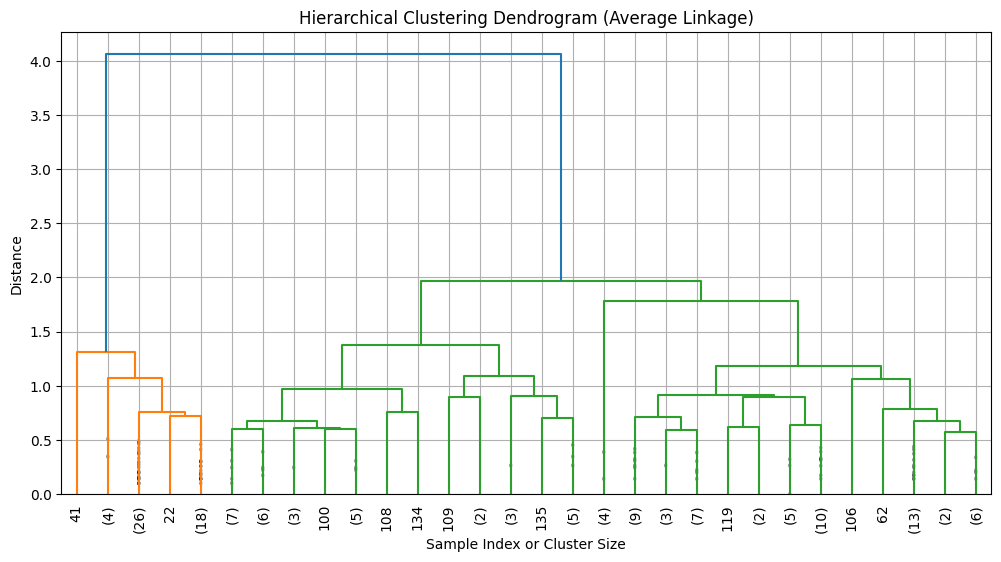

In [10]:
# 30 Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
# Step 1: Import required libraries
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data
labels = iris.target  # Not used in clustering, just for comparison if needed

# Step 3: Compute the linkage matrix using 'average' method
linkage_matrix = linkage(X, method='average')

# Step 4: Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix,
           truncate_mode='lastp',     # show only the last p merged clusters (optional)
           p=30,
           leaf_rotation=90.,
           leaf_font_size=10.,
           show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


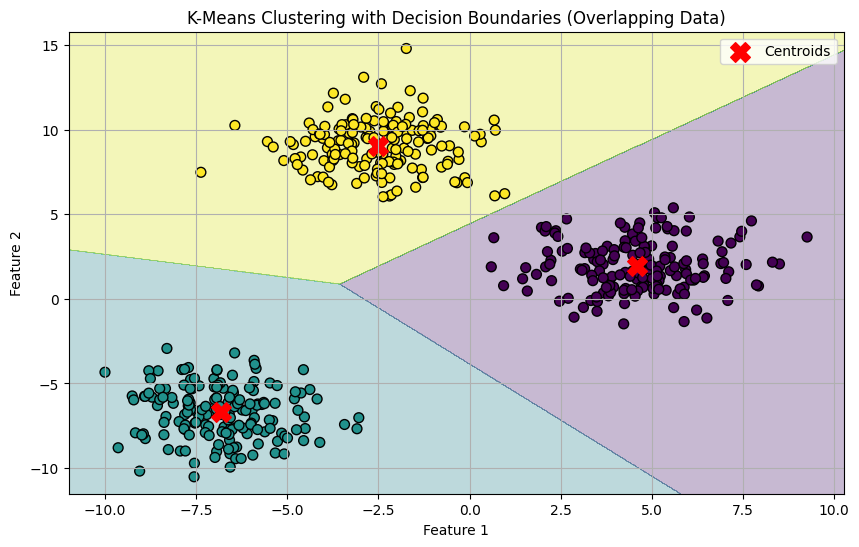

In [11]:
# 31  Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries
# Step 1: Import libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Generate synthetic data with overlapping clusters
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=1.5, random_state=42)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Step 4: Create meshgrid for decision boundary
h = 0.02  # Step size in mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot decision boundaries and clusters
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering with Decision Boundaries (Overlapping Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


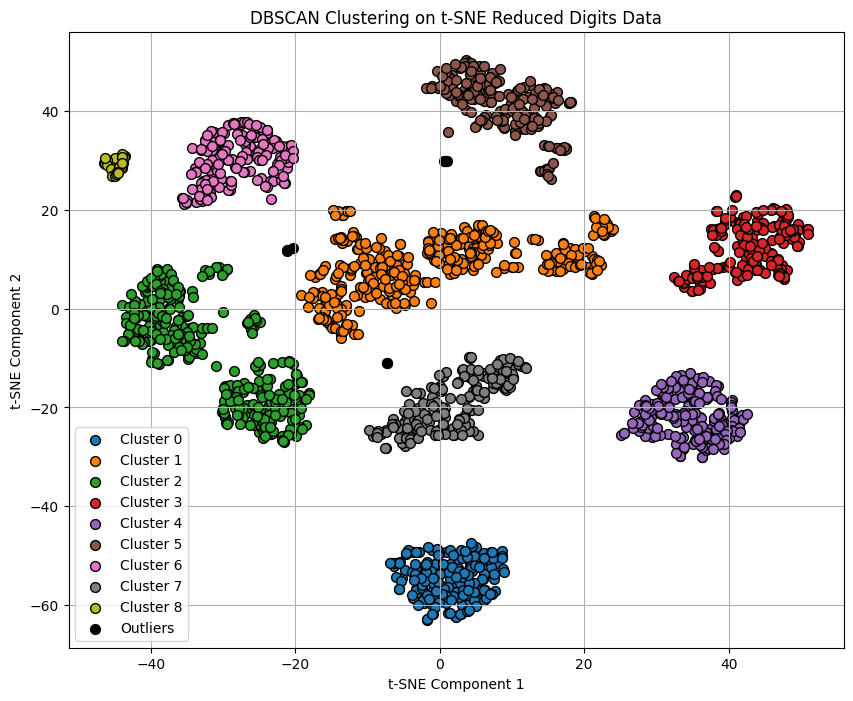

In [14]:
# 32 Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results
# Step 1: Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # True labels (optional, not used in DBSCAN)

# Step 3: Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Step 4: Apply DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Step 5: Visualize the clustering result
plt.figure(figsize=(10, 8))
unique_labels = set(labels)
colors = [plt.cm.tab10(i / 10.0) for i in range(len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)

    if k == -1:
        col = 'black'
        label_name = 'Outliers'
    else:
        label_name = f'Cluster {k}'

    xy = X_tsne[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=label_name, s=50, edgecolors='k')

plt.title("DBSCAN Clustering on t-SNE Reduced Digits Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()


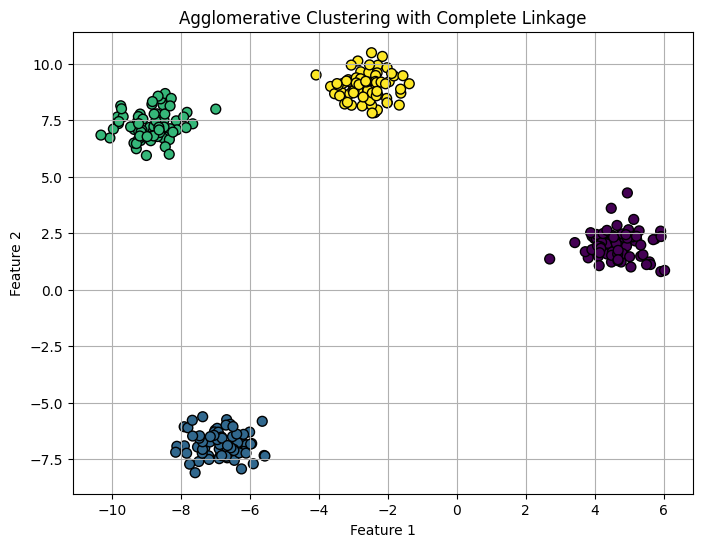

In [15]:
# 33 Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

# Step 1: Import required libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 2: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 3: Apply Agglomerative Clustering with complete linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agglo.fit_predict(X)

# Step 4: Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k')
plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


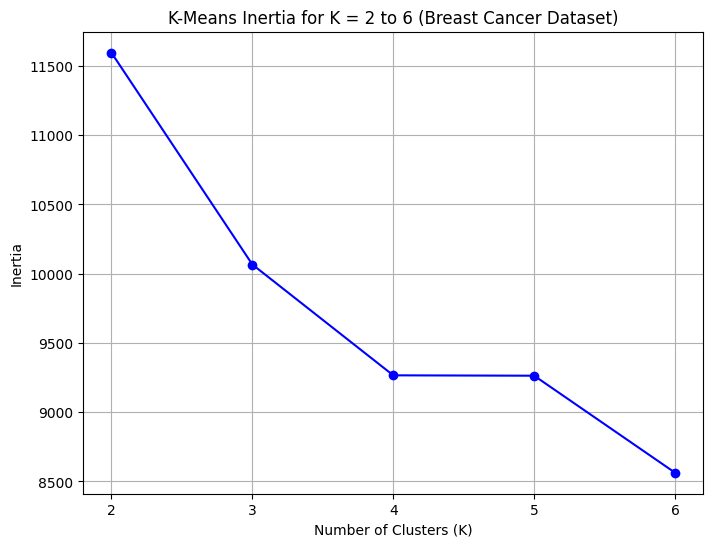

In [16]:
# 34 Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot
# Step 1: Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 2: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means for K = 2 to 6 and store inertia
k_values = range(2, 7)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Step 5: Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='blue')
plt.title("K-Means Inertia for K = 2 to 6 (Breast Cancer Dataset)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.show()


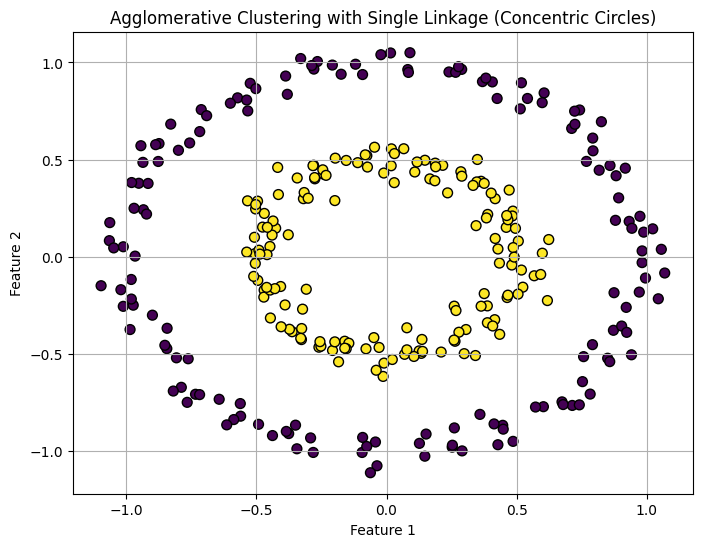

In [17]:
# 35 Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage
# Step 1: Import necessary libraries
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 2: Generate synthetic concentric circles
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Step 3: Apply Agglomerative Clustering with single linkage
agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X)

# Step 4: Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k')
plt.title("Agglomerative Clustering with Single Linkage (Concentric Circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [18]:
# 36 Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noisce )
# Step 1: Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 2: Load the Wine dataset
data = load_wine()
X = data.data

# Step 3: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 5: Count the number of clusters (excluding noise label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")



Number of clusters (excluding noise): 0
Number of noise points: 178


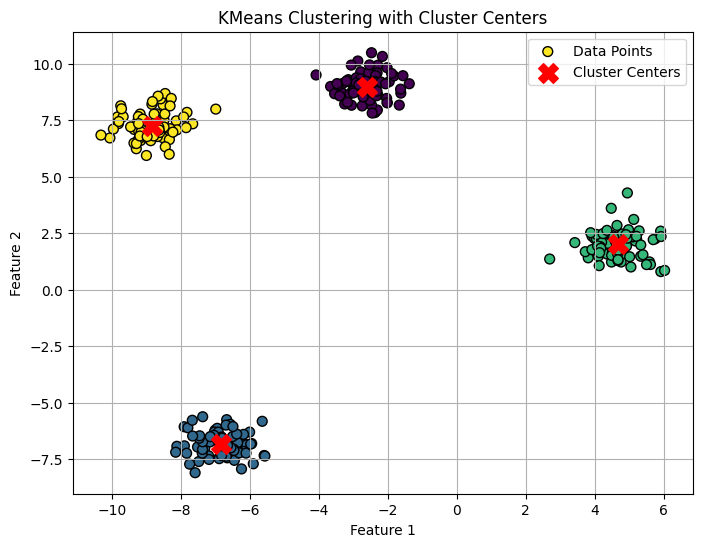

In [19]:
# 37 Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points
# Step 1: Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 2: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Step 4: Plot the data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolors='k', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()



In [20]:
# 38 Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise
# Step 1: Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 3: Standardize the data (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 5: Count the number of noise samples (label = -1)
n_noise = list(labels).count(-1)

print(f"Number of samples identified as noise: {n_noise}")


Number of samples identified as noise: 26


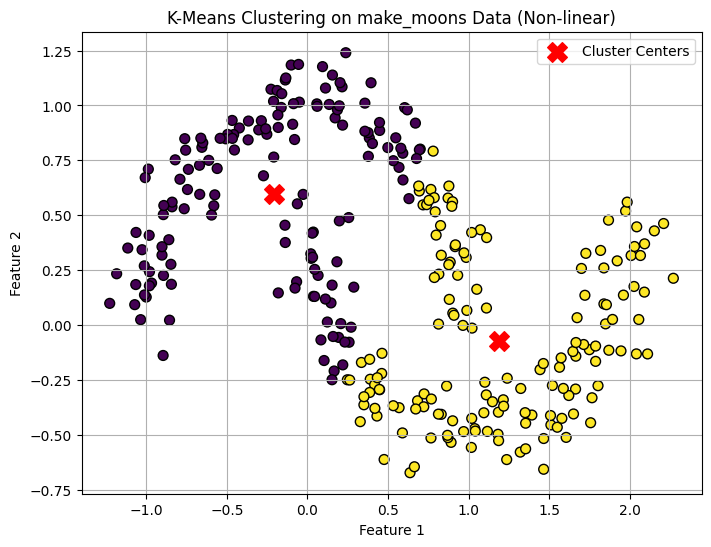

In [21]:
# 39.Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result
# Step 1: Import necessary libraries
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 2: Generate synthetic non-linear data
X, y_true = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 4: Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Cluster Centers')
plt.title("K-Means Clustering on make_moons Data (Non-linear)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


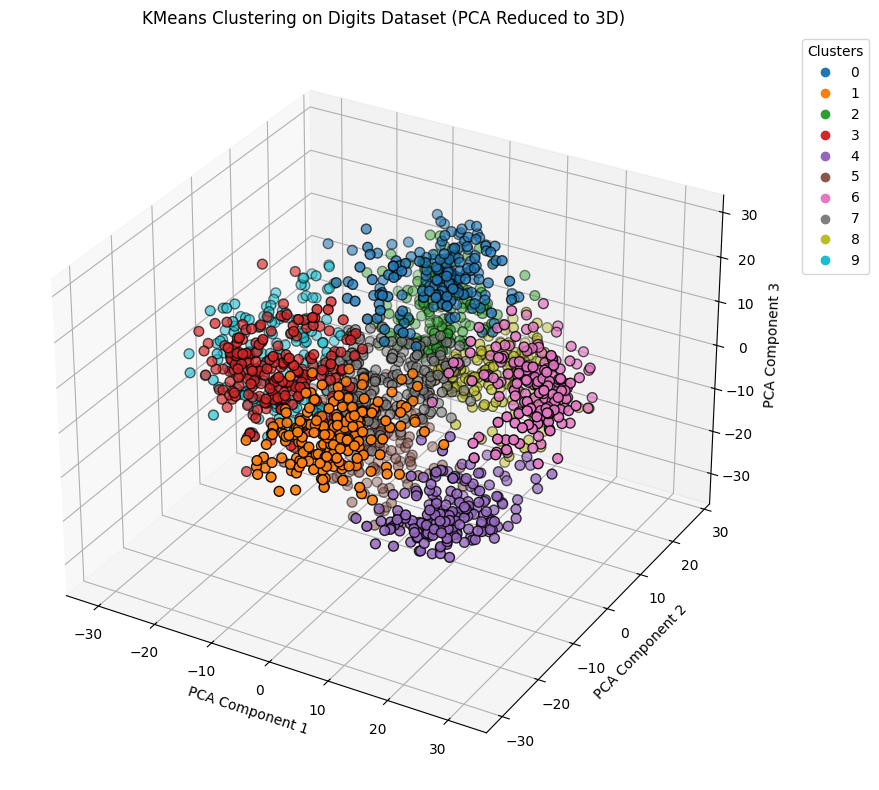

In [22]:
# 40.Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot
# Step 1: Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Step 2: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # Actual labels (not used for clustering)

# Step 3: Reduce to 3 PCA components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Step 4: Apply KMeans clustering (10 clusters for digits 0–9)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Step 5: Visualize the clustering result in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='tab10', s=50, edgecolors='k')

ax.set_title("KMeans Clustering on Digits Dataset (PCA Reduced to 3D)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [23]:
# 41.Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering
# Step 1: Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Generate synthetic data with 5 centers
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.7, random_state=42)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

# Step 4: Evaluate using silhouette score
score = silhouette_score(X, labels)

# Step 5: Display the result
print(f"Silhouette Score for KMeans with 5 clusters: {score:.4f}")


Silhouette Score for KMeans with 5 clusters: 0.7657


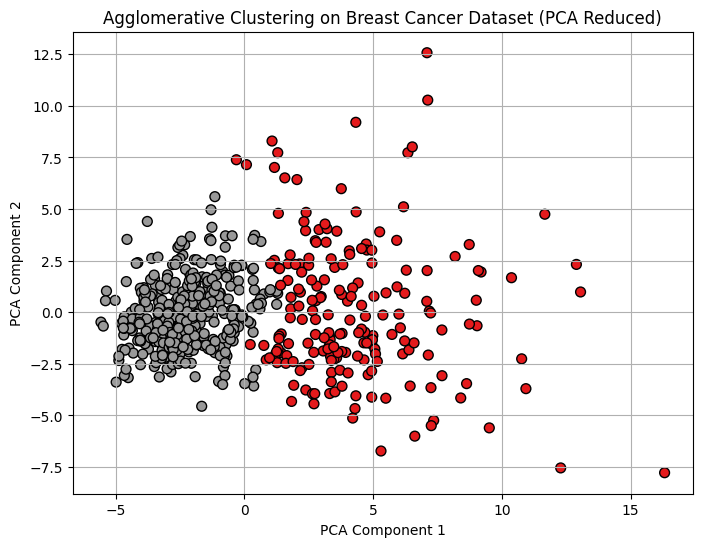

In [24]:
# 42.Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.Visualize in 2D
# Step 1: Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 2: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')  # You can try 'average', 'complete' too
labels = agglo.fit_predict(X_pca)

# Step 6: Visualize in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=50, edgecolors='k')
plt.title("Agglomerative Clustering on Breast Cancer Dataset (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


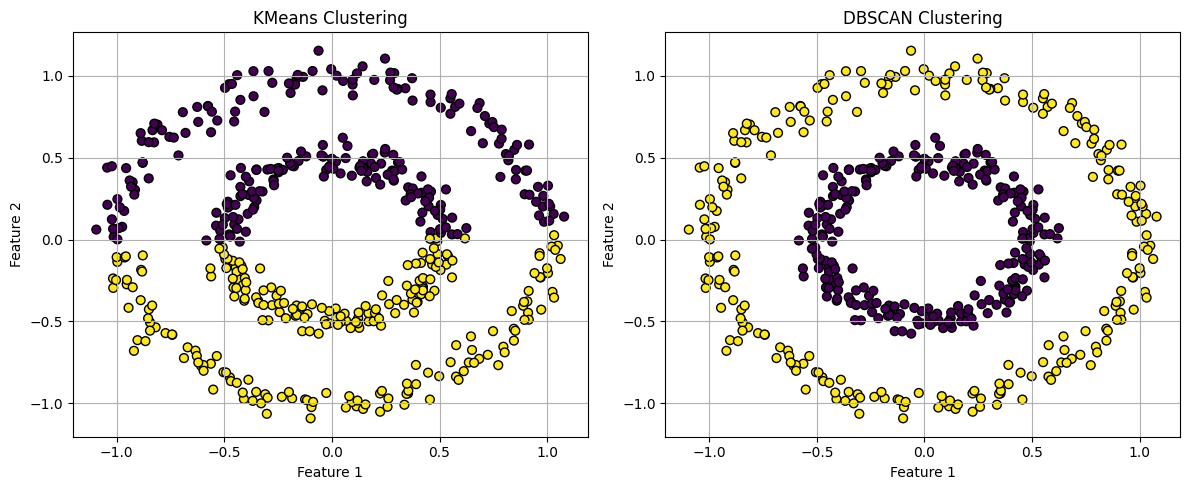

In [25]:
# 43.Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side
# Step 1: Import required libraries
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

# Step 2: Generate synthetic noisy circular data
X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# Step 4: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Step 5: Plot both clustering results side-by-side
plt.figure(figsize=(12, 5))

# Plot KMeans results
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', s=40, edgecolors='k')
plt.title("KMeans Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# Plot DBSCAN results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis', s=40, edgecolors='k')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()


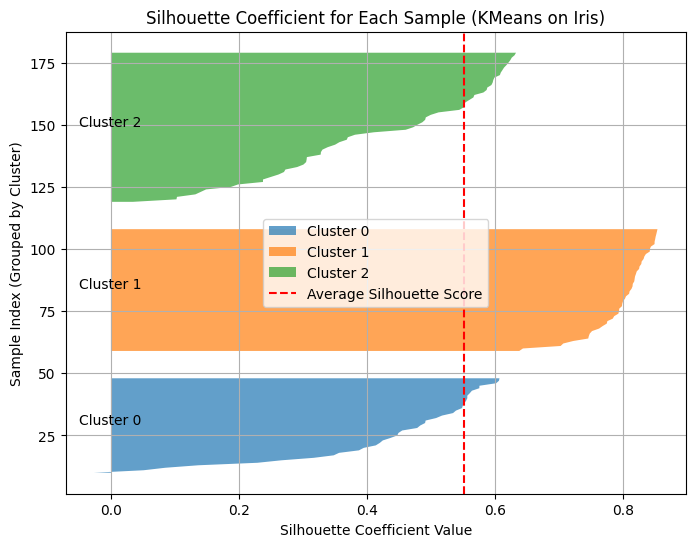

In [26]:
# 44.Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering
# Step 1: Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Step 4: Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(X, labels)
avg_silhouette = silhouette_score(X, labels)

# Step 5: Plot the silhouette scores
plt.figure(figsize=(8, 6))
y_lower = 10  # for spacing between clusters in the plot

for i in range(3):  # for each cluster
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7, label=f'Cluster {i}')
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    y_lower = y_upper + 10  # 10 for spacing between clusters

plt.axvline(x=avg_silhouette, color='red', linestyle='--', label='Average Silhouette Score')
plt.title("Silhouette Coefficient for Each Sample (KMeans on Iris)")
plt.xlabel("Silhouette Coefficient Value")
plt.ylabel("Sample Index (Grouped by Cluster)")
plt.legend()
plt.grid(True)
plt.show()


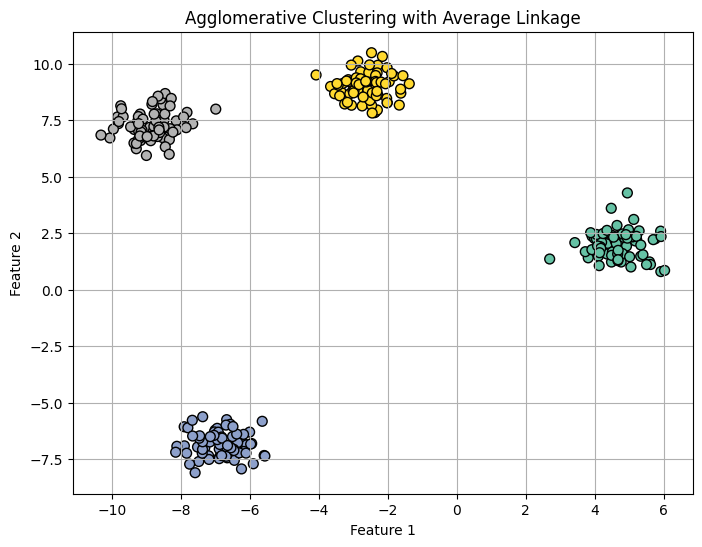

In [27]:
# 45.Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.visualize clusters
# Step 1: Import required libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 2: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Step 3: Apply Agglomerative Clustering with 'average' linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2', s=50, edgecolors='k')
plt.title("Agglomerative Clustering with Average Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


/tmp/ipython-input-28-1679027911.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset['Cluster'] = labels


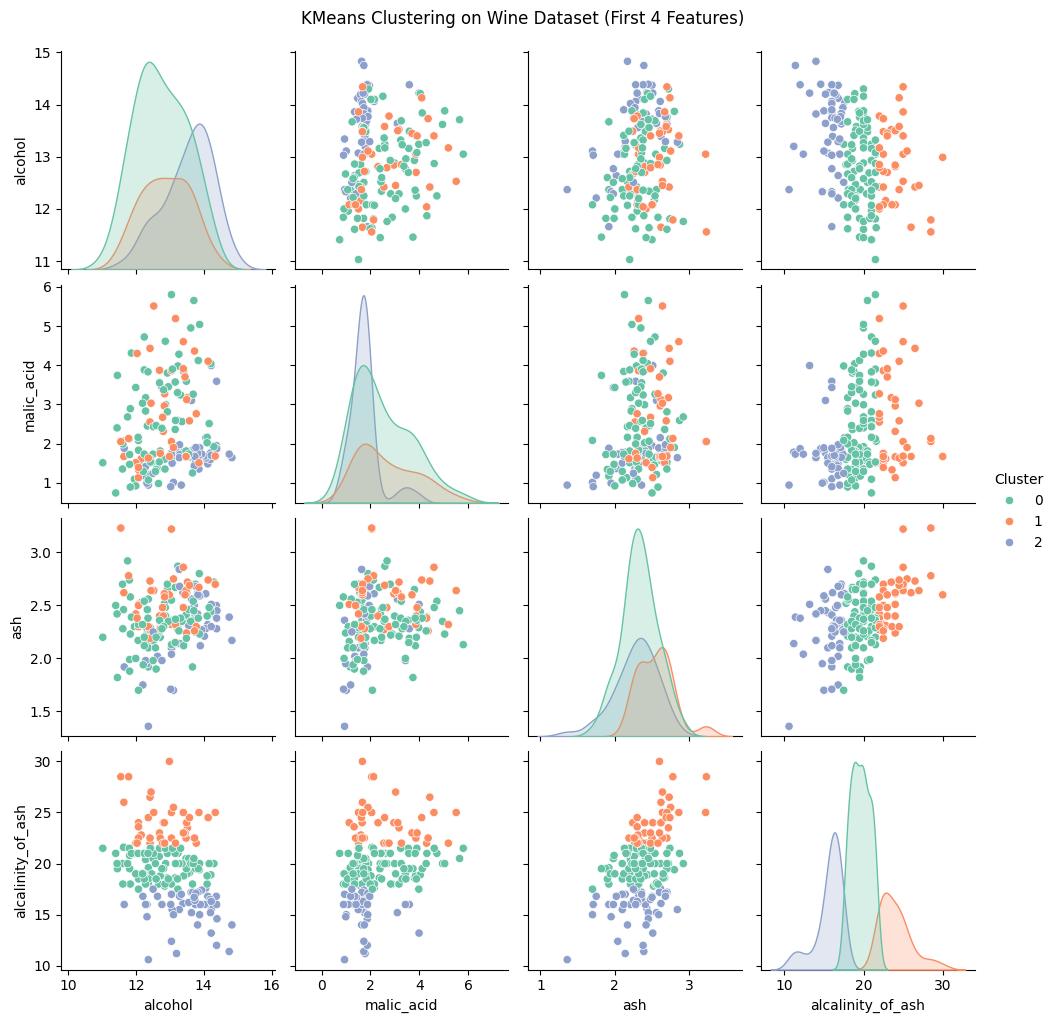

In [28]:
# 46.Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)
# Step 1: Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Wine dataset
data = load_wine()
X = data.data
feature_names = data.feature_names
X_df = pd.DataFrame(X, columns=feature_names)

# Step 3: Use only the first 4 features
X_subset = X_df.iloc[:, :4]

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_subset)

# Step 5: Add cluster labels to the DataFrame
X_subset['Cluster'] = labels

# Step 6: Create a pairplot using Seaborn
sns.pairplot(X_subset, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


In [29]:
# 47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.
# Step 1: Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# Step 2: Generate noisy blob data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 4: Count clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

# Step 5: Print results
print(f"Number of clusters found (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")



Number of clusters found (excluding noise): 5
Number of noise points: 43


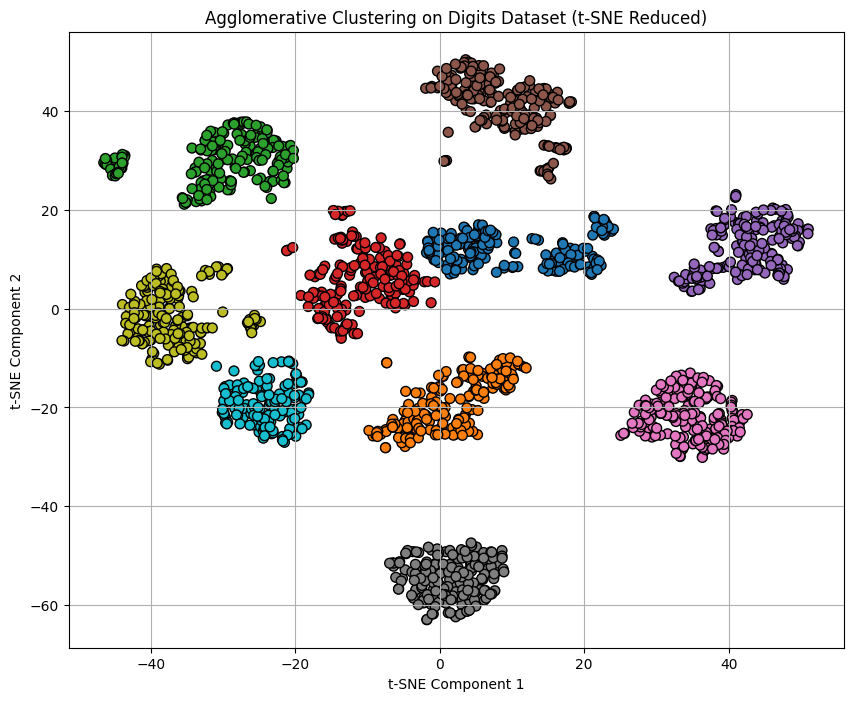

In [30]:
# 48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.
# Step 1: Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 2: Load the Digits dataset
digits = load_digits()
X = digits.data

# Step 3: Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Step 4: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=10, linkage='ward')  # 10 digits (0-9)
labels = agglo.fit_predict(X_tsne)

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=50, edgecolors='k')
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

